# Section 1: unzip the file

In [308]:
!pwd
%cd ..
%cd ..

/root/.local/share/Trash/files/Surprised 1
/root/.local/share/Trash/files
/root/.local/share/Trash


In [309]:
%cd /notebooks

/notebooks


In [252]:
#!unzip FINAL_FINAL_VIDEO_3OFUS.zip

In [15]:
#!unzip VIDEO_3OFUS.zip

In [253]:
%mkdir FINAL_FINAL_VIDEO_3OFUS_cp
%cp -r /notebooks/FINAL_FINAL_VIDEO_3OFUS/Confused /notebooks/FINAL_FINAL_VIDEO_3OFUS_cp
%cp -r /notebooks/FINAL_FINAL_VIDEO_3OFUS/Happy /notebooks/FINAL_FINAL_VIDEO_3OFUS_cp
%cp -r /notebooks/FINAL_FINAL_VIDEO_3OFUS/Surprised /notebooks/FINAL_FINAL_VIDEO_3OFUS_cp

## Section 2: eparate photo to 3 individual

In [236]:
filename[0][-6:-4]

'_1'

In [311]:
filename = os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised')
len(filename)

FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised'

In [310]:
!pwd
%cd FINAL_FINAL_VIDEO_3OFUS_cp/Surprised

/notebooks
[Errno 2] No such file or directory: 'FINAL_FINAL_VIDEO_3OFUS_cp/Surprised'
/notebooks


In [256]:
filename = os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised')
filename1=[]
for i in filename:
    if i[-6:-4]=='_1':
        os.rename(i,'lingyao_'+i)
    if i[-6:-4]=='_2':
        os.rename(i,'tracey_'+i)
    elif i[-6:-4]=='_3':
        os.rename(i,'michelle_'+i)
#     filename1.append(i)
# filename1[:5]

In [258]:
%cd ..

/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp


In [259]:
#%cd FINAL_FINAL_VIDEO_3OFUS_cp
%mkdir michelle
%mkdir lingyao
%mkdir tracey

In [260]:
%cd michelle
%mkdir happy
%mkdir confuse
%mkdir surprise

/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/michelle


In [261]:
%cd ..
%cd tracey
%mkdir happy
%mkdir confuse
%mkdir surprise

/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp
/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/tracey


In [262]:
%cd ..
%cd lingyao
%mkdir happy
%mkdir confuse
%mkdir surprise

/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp
/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/lingyao


In [307]:
filename1 = os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised')
michelle_list=[]
lingyao_list=[]
tracey_list=[]
for i in filename1:
    if i.startswith('michelle_'):
        michelle_list.append(i)
    elif i.startswith('lingyao_'):
        lingyao_list.append(i)
    elif i.startswith('tracey_'):
        tracey_list.append(i)
print(len(michelle_list))
print(len(lingyao_list))
print(len(tracey_list))

FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised'

In [265]:
!pwd
%cd ..
%cd Surprised

/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/lingyao
/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp
/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/Surprised


In [266]:
import shutil
for f in michelle_list:
    shutil.move(f, '/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/michelle/surprise')

In [267]:
for f in lingyao_list:
    shutil.move(f, '/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/lingyao/surprise')

In [268]:
for f in tracey_list:
    shutil.move(f, '/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/tracey/surprise')

# Section 3: RUN FROM HERE: One person -tracey

In [338]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

EMOTION_DICT = {0:'confused', 1: 'happy', 2: 'surprised'}
base_path='/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/tracey'
nb_validation_samples = 53
batch_size=1
image_size =224
emotionCount=[]
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# We need to recreate our validation generator with shuffle = false
test_generator = data_generator.flow_from_directory(
    directory = base_path,
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode ='categorical',
    shuffle = False,
    seed = 123
)
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#Confution Matrix and Classification Report
Y_pred = model_top.predict_generator(test_generator, nb_validation_samples)
Y_pred[:5]

y_pred = np.argmax(Y_pred, axis=1)
for i in y_pred:
    emotionCount.append(EMOTION_DICT[i])
Counter(emotionCount)
y_pred

Found 53 images belonging to 3 classes.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2])

In [339]:
import pandas as pd
test = pd.DataFrame(Y_pred)
time=os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/tracey/surprise')
time1 = sorted(time)
time2=[]
for i in time1:
    time=i[18:22]
    time2.append(time)
len(time2)
time3=pd.DataFrame(time2)
time3.columns=['time']
df =pd.DataFrame(Y_pred)
df.columns=['prob_conf','prob_happy','prob_surp']
df1=pd.concat([time3,df],axis=1)
df1['conf_SMA_3'] = df1.iloc[:,1].rolling(window=3).mean()
df1['happy_SMA_3'] = df1.iloc[:,2].rolling(window=3).mean()
df1['surp_SMA_3'] = df1.iloc[:,3].rolling(window=3).mean()
df1[:5]

,time,prob_conf,prob_happy,prob_surp,conf_SMA_3,happy_SMA_3,surp_SMA_3
0,5107,0.006258,0.990788,0.002953,NaN,NaN,NaN
1,5109,0.000660,0.999280,0.000059,NaN,NaN,NaN
2,5110,0.000226,0.999746,0.000028,0.002382,0.996605,0.001014
3,5111,0.000157,0.999814,0.000029,0.000348,0.999613,0.000039
4,5112,0.000022,0.999951,0.000027,0.000135,0.999837,0.000028


Text(0.5, 1.0, 'Tracey emotion time plot')

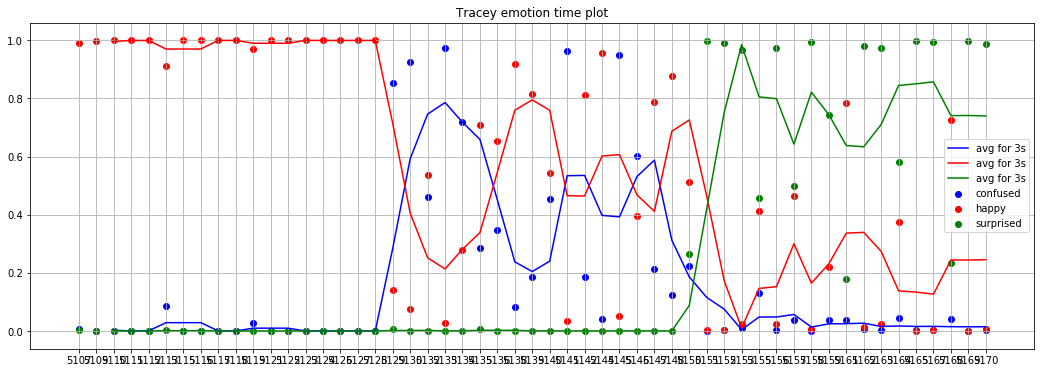

In [340]:
plt.figure(figsize=(18,6))
plt.grid(True)
plt.scatter(df1['time'],df1['prob_conf'],color='b',label='confused')
plt.scatter(df1['time'],df1['prob_happy'],color='r', label='happy')
plt.scatter(df1['time'],df1['prob_surp'],color='g',label='surprised')

plt.plot(df1.time, df1['conf_SMA_3'],color='b',label='avg for 3s')
plt.plot(df1.time, df1['happy_SMA_3'],color='r',label='avg for 3s')
plt.plot(df1.time, df1['surp_SMA_3'],color='g',label='avg for 3s')

plt.legend()
plt.title('Tracey emotion time plot')

# michelle

In [341]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

EMOTION_DICT = {0:'confused', 1: 'happy', 2: 'surprised'}
base_path='/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/michelle'
nb_validation_samples = 53
batch_size=1
image_size =224
emotionCount=[]
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# We need to recreate our validation generator with shuffle = false
test_generator = data_generator.flow_from_directory(
    directory = base_path,
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode ='categorical',
    shuffle = False,
    seed = 123
)
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#Confution Matrix and Classification Report
Y_pred = model_top.predict_generator(test_generator, nb_validation_samples)
Y_pred
y_pred = np.argmax(Y_pred, axis=1)
for i in y_pred:
    emotionCount.append(EMOTION_DICT[i])
Counter(emotionCount)

Found 53 images belonging to 3 classes.


Counter({'confused': 14, 'happy': 32, 'surprised': 7})

In [342]:
import pandas as pd
test = pd.DataFrame(Y_pred)
time=os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/michelle/surprise')
time1 = sorted(time)
time2=[]
for i in time1:
    time=i[20:24]
    time2.append(time)
len(time2)
time3=pd.DataFrame(time2)
time3.columns=['time']
df =pd.DataFrame(Y_pred)
df.columns=['prob_conf','prob_happy','prob_surp']
df1=pd.concat([time3,df],axis=1)
df1['conf_SMA_3'] = df1.iloc[:,1].rolling(window=3).mean()
df1['happy_SMA_3'] = df1.iloc[:,2].rolling(window=3).mean()
df1['surp_SMA_3'] = df1.iloc[:,3].rolling(window=3).mean()
df1[:5]

,time,prob_conf,prob_happy,prob_surp,conf_SMA_3,happy_SMA_3,surp_SMA_3
0,5107,0.040693,0.955253,0.004055,NaN,NaN,NaN
1,5109,0.077436,0.919412,0.003153,NaN,NaN,NaN
2,5110,0.010692,0.986875,0.002433,0.042940,0.953846,0.003213
3,5111,0.063770,0.932501,0.003729,0.050633,0.946262,0.003105
4,5112,0.003554,0.994241,0.002205,0.026006,0.971206,0.002789


Text(0.5, 1.0, 'Michelle emotion time plot')

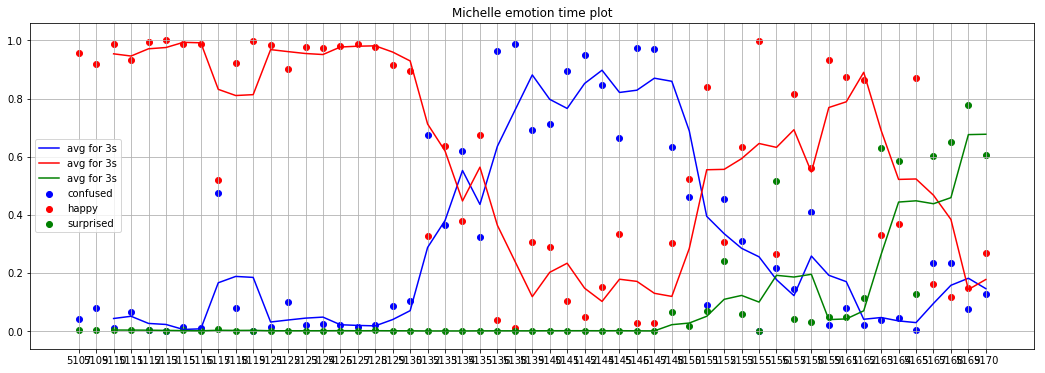

In [343]:
plt.figure(figsize=(18,6))

plt.grid(True)
plt.scatter(df1['time'],df1['prob_conf'],color='b',label='confused')
plt.scatter(df1['time'],df1['prob_happy'],color='r', label='happy')
plt.scatter(df1['time'],df1['prob_surp'],color='g',label='surprised')

plt.plot(df1.time, df1['conf_SMA_3'],color='b',label='avg for 3s')
plt.plot(df1.time, df1['happy_SMA_3'],color='r',label='avg for 3s')
plt.plot(df1.time, df1['surp_SMA_3'],color='g',label='avg for 3s')
plt.legend()
plt.title('Michelle emotion time plot')

# Lingyao

In [344]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

EMOTION_DICT = {0:'confused', 1: 'happy', 2: 'surprised'}
base_path='/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/lingyao'
nb_validation_samples = 53
batch_size=1
image_size =224
emotionCount=[]
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# We need to recreate our validation generator with shuffle = false
test_generator = data_generator.flow_from_directory(
    directory = base_path,
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode ='categorical',
    shuffle = False,
    seed = 123
)
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#Confution Matrix and Classification Report
Y_pred = model_top.predict_generator(test_generator, nb_validation_samples)
Y_pred
y_pred = np.argmax(Y_pred, axis=1)
for i in y_pred:
    emotionCount.append(EMOTION_DICT[i])
Counter(emotionCount)

Found 53 images belonging to 3 classes.


Counter({'confused': 10, 'happy': 30, 'surprised': 13})

In [345]:
import pandas as pd
test = pd.DataFrame(Y_pred)
time=os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS_cp/lingyao/surprise')
time1 = sorted(time)
time2=[]
for i in time1:
    time=i[19:23]
    time2.append(time)
len(time2)
time3=pd.DataFrame(time2)
time3.columns=['time']
df =pd.DataFrame(Y_pred)
df.columns=['prob_conf','prob_happy','prob_surp']
df1=pd.concat([time3,df],axis=1)
df1['conf_SMA_3'] = df1.iloc[:,1].rolling(window=3).mean()
df1['happy_SMA_3'] = df1.iloc[:,2].rolling(window=3).mean()
df1['surp_SMA_3'] = df1.iloc[:,3].rolling(window=3).mean()
df1[:5]

,time,prob_conf,prob_happy,prob_surp,conf_SMA_3,happy_SMA_3,surp_SMA_3
0,5107,0.002920,0.996725,0.000354,NaN,NaN,NaN
1,5109,0.001771,0.991378,0.006851,NaN,NaN,NaN
2,5110,0.000085,0.998928,0.000987,0.001592,0.995677,0.002731
3,5111,0.000046,0.998664,0.001289,0.000634,0.996324,0.003042
4,5112,0.000008,0.999908,0.000084,0.000046,0.999167,0.000787


Text(0.5, 1.0, 'Lingyao emotion time plot')

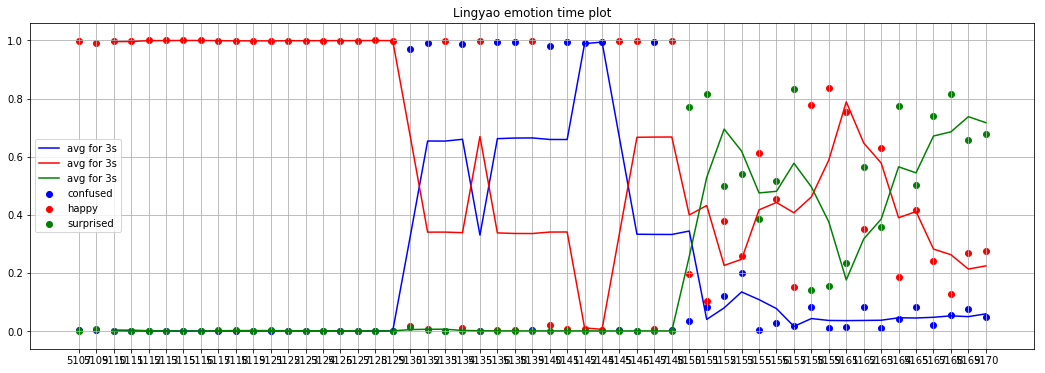

In [346]:
plt.figure(figsize=(18,6))
plt.grid(True)
plt.scatter(df1['time'],df1['prob_conf'],color='b',label='confused')
plt.scatter(df1['time'],df1['prob_happy'],color='r', label='happy')
plt.scatter(df1['time'],df1['prob_surp'],color='g',label='surprised')

plt.plot(df1.time, df1['conf_SMA_3'],color='b',label='avg for 3s')
plt.plot(df1.time, df1['happy_SMA_3'],color='r',label='avg for 3s')
plt.plot(df1.time, df1['surp_SMA_3'],color='g',label='avg for 3s')
plt.legend()
plt.title('Lingyao emotion time plot')

# Three people - TOP PREDICTOR_GENERATOR ---> here

In [347]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from collections import Counter
model_top = load_model('/notebooks/model_save/3cls_224_ConfHappySur_Color_newimg.h5')

In [348]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

EMOTION_DICT = {0:'confused', 1: 'happy', 2: 'surprised'}
base_path='/notebooks/FINAL_FINAL_VIDEO_3OFUS/'
nb_validation_samples = 159
batch_size=1
image_size =224
emotionCount=[]
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# We need to recreate our validation generator with shuffle = false
test_generator = data_generator.flow_from_directory(
    directory = base_path,
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode ='categorical',
    shuffle = False,
    seed = 123
)
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#Confution Matrix and Classification Report
Y_pred = model_top.predict_generator(test_generator, nb_validation_samples)
                                 #nb_validation_samples /batch_size)
Y_pred
y_pred = np.argmax(Y_pred, axis=1)
for i in y_pred:
    emotionCount.append(EMOTION_DICT[i])
Counter(emotionCount)

Found 159 images belonging to 3 classes.


Counter({'confused': 31, 'happy': 93, 'surprised': 35})

In [349]:
import pandas as pd
test = pd.DataFrame(Y_pred)
time=os.listdir('/notebooks/FINAL_FINAL_VIDEO_3OFUS/Surprised')
time1 = sorted(time)
time2=[]
for i in time1:
    time=i[11:15]
    time2.append(time)
len(time2)
time3=pd.DataFrame(time2)
time3.columns=['time']
df =pd.DataFrame(Y_pred)
df.columns=['prob_conf','prob_happy','prob_surp']
df1=pd.concat([time3,df],axis=1)
df1['conf_SMA_8'] = df1.iloc[:,1].rolling(window=8).mean()
df1['happy_SMA_8'] = df1.iloc[:,2].rolling(window=8).mean()
df1['surp_SMA_8'] = df1.iloc[:,3].rolling(window=8).mean()
df1[:5]

,time,prob_conf,prob_happy,prob_surp,conf_SMA_8,happy_SMA_8,surp_SMA_8
0,5107,0.002920,0.996725,0.000354,NaN,NaN,NaN
1,5107,0.006258,0.990788,0.002953,NaN,NaN,NaN
2,5107,0.040693,0.955253,0.004055,NaN,NaN,NaN
3,5109,0.001771,0.991378,0.006851,NaN,NaN,NaN
4,5109,0.000660,0.999280,0.000059,NaN,NaN,NaN


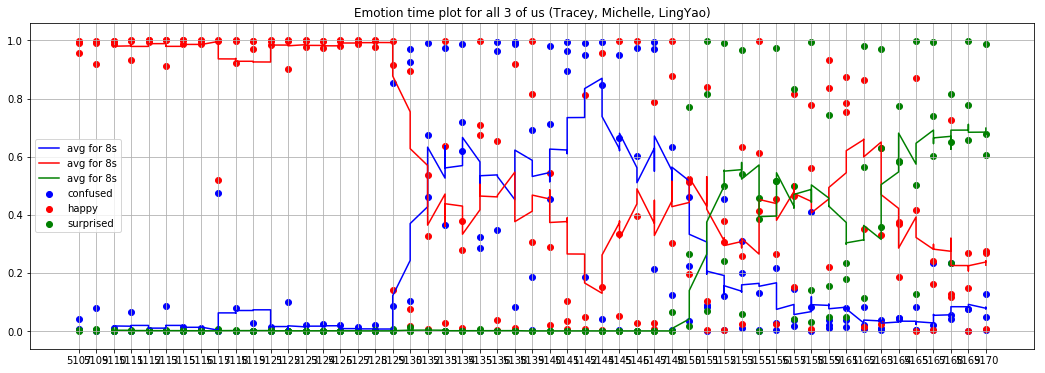

In [350]:
plt.figure(figsize=(18,6))
plt.grid(True)
plt.scatter(df1['time'],df1['prob_conf'],color='b',label='confused')
plt.scatter(df1['time'],df1['prob_happy'],color='r', label='happy')
plt.scatter(df1['time'],df1['prob_surp'],color='g',label='surprised')

plt.plot(df1.time, df1['conf_SMA_8'],color='b',label='avg for 8s')
plt.plot(df1.time, df1['happy_SMA_8'],color='r',label='avg for 8s')
plt.plot(df1.time, df1['surp_SMA_8'],color='g',label='avg for 8s')
plt.title('Emotion time plot for all 3 of us (Tracey, Michelle, LingYao)')
plt.legend()

In [70]:
# if confused < 0.6 
# if confused <0.6 and surprise > 0.1
# else happy
# (Y_pred[i][0] conf
#(Y_pred[i][1] happy
# (Y_pred[i][2] surprise

#new_data=pd.DataFrame(Y_pred)
#new_data2 = data["time"]
emotion_class=[]
emotion=[]
for i in range(len(Y_pred)):
    if (Y_pred[i][0] > 0.3):
        emotion_class.append(0)
        emotion.append( "confused")
    elif (Y_pred[i][0] < 0.3 and Y_pred[i][2]>0.05):
        emotion_class.append(2)
        emotion.append( "surprised")
    else:
        emotion_class.append(1)
        emotion.append( "happy")
emotion_class_1 = pd.DataFrame(emotion_class)
emotion_1 = pd.DataFrame(emotion)
Counter(emotion_1[0])
#cal_data = pd.concat([new_data2, new_data,emotion_class_1,emotion_1], axis=1)
#cal_data.columns=['time','pr_conf','pr_happy','emotion_class','emotion']

Counter({'confused': 31, 'happy': 96, 'surprised': 26})

In [644]:
cal_data

,time,pr_conf,pr_happy,emotion_class,emotion
0,3903.0,0.998943,0.001057,0.0,confused
1,3903.0,0.850046,0.149954,0.0,confused
2,3905.0,0.091733,0.908267,1.0,happy
3,3905.0,0.803761,0.196239,0.0,confused
4,3905.0,0.023954,0.976046,1.0,happy
...,...,...,...,...,...
155,3973.0,NaN,NaN,NaN,NaN
156,3974.0,NaN,NaN,NaN,NaN
157,3974.0,NaN,NaN,NaN,NaN
158,3976.0,NaN,NaN,NaN,NaN


In [645]:
cal_data_sub = cal_data.groupby(['time','emotion_class']).size()
cal_data_sub = cal_data_sub.to_frame(name = 'Num_Count').reset_index()
# new_df.emotion_class.replace(to_replace=[0,1], value=["confused", "not confused"])
new_df

,time,emotion_class,Num_Count,confused_count,nonconfused_count
0,3903.0,0,2,2,0
1,3905.0,1,3,0,3
2,3906.0,0,1,1,0
3,3906.0,1,2,0,2
4,3908.0,1,3,0,3
...,...,...,...,...,...
76,3972.0,0,1,1,0
77,3972.0,1,1,0,1
78,3973.0,1,1,0,1
79,3974.0,1,2,0,2


In [646]:
cal_data.to_csv('cal_data_output.csv')

In [650]:
cal_data_sub_dropFinalfew = cal_data_sub[4:len(cal_data_sub)-6]
cal_data_sub_dropFinalfew = cal_data_sub[:]

In [651]:
df_confused = cal_data_sub_dropFinalfew.query('emotion_class == 0')
df_not_confused =  cal_data_sub_dropFinalfew.query('emotion_class == 1')

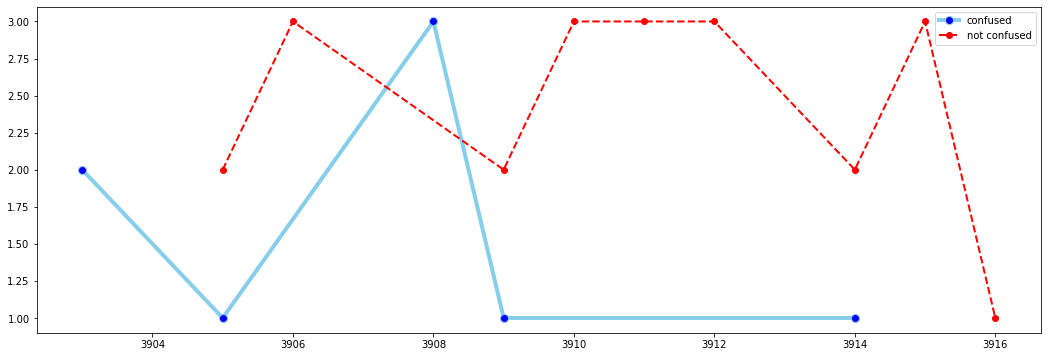

In [652]:
plt.figure(figsize=(18,6))
plt.plot(df_confused.time, df_confused.Num_Count,marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4, label = 'confused')
plt.plot(df_not_confused.time, df_not_confused.Num_Count,marker='o', color='red', linewidth=2, linestyle='dashed', label="not confused")
plt.legend()

In [584]:
cal_data_sub['confused_count'] = cal_data_sub['Num_Count']
cal_data_sub['nonconfused_count'] = cal_data_sub['Num_Count']

filter_non_confused = cal_data_sub['emotion_class']==1
cal_data_sub['confused_count'] = cal_data_sub['confused_count'].mask(filter_non_confused, float('nan'))

filter_confused = cal_data_sub['emotion_class']==0
cal_data_sub['nonconfused_count'] = cal_data_sub['nonconfused_count'].mask(filter_confused,float('nan'))

cal_data_sub

,time,emotion_class,Num_Count,confused_count,nonconfused_count
0,3903.0,0.0,2,2.0,NaN
1,3905.0,0.0,3,3.0,NaN
2,3906.0,0.0,3,3.0,NaN
3,3908.0,0.0,3,3.0,NaN
4,3909.0,0.0,3,3.0,NaN
5,3910.0,0.0,3,3.0,NaN
6,3911.0,0.0,3,3.0,NaN
7,3912.0,0.0,3,3.0,NaN
8,3914.0,0.0,3,3.0,NaN
9,3915.0,0.0,3,3.0,NaN


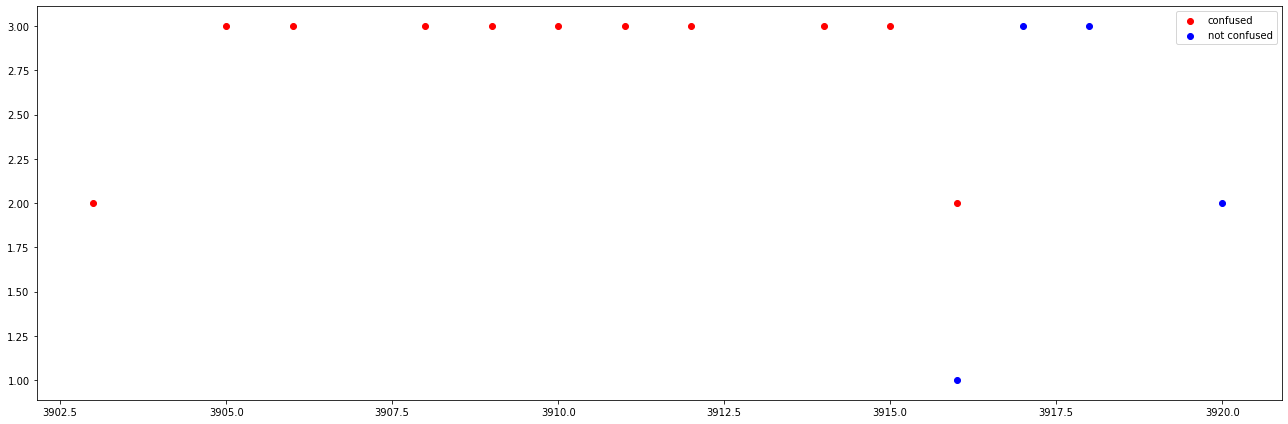

In [585]:
plt.figure(figsize=(18,6))
# plt.plot(cal_data_sub.time, cal_data_sub.confused_count,marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label = 'confused')
# plt.plot(cal_data_sub.time, cal_data_sub.nonconfused_count,marker='o', color='red', linewidth=2, linestyle='dashed', label="not confused")
plt.scatter(cal_data_sub.time,cal_data_sub.confused_count, color='red', label = 'confused')
plt.scatter(cal_data_sub.time, cal_data_sub.nonconfused_count, color='blue', label="not confused")

plt.legend()
plt.tight_layout()

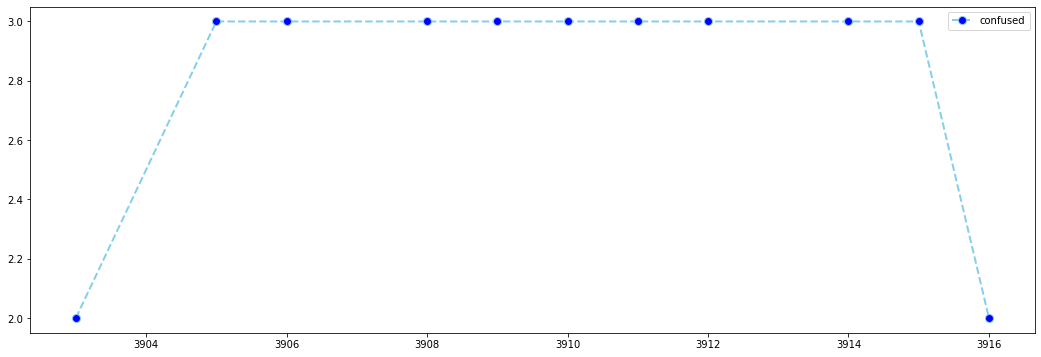

In [586]:
plt.figure(figsize=(18,6))
plt.plot(cal_data_sub.time, cal_data_sub.confused_count,marker='o', markerfacecolor='blue', markersize=8, color='skyblue',linestyle='dashed', linewidth=2, label = 'confused')
plt.legend()

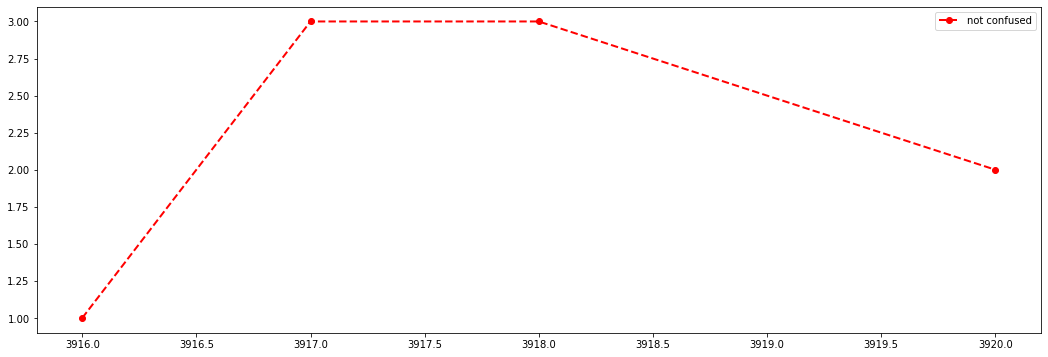

In [587]:
plt.figure(figsize=(18,6))
plt.plot(cal_data_sub.time, cal_data_sub.nonconfused_count,marker='o', color='red', linewidth=2, linestyle='dashed', label="not confused")
plt.legend()